<a href="https://colab.research.google.com/github/juanfelipegonzalezalfonso/programacion1/blob/main/piton2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hola mundo")

hola mundo


In [ ]:
hola_mundo = "hola mundo"
print(hola_mundo)

hola mundo


In [ ]:
type(hola_mundo)

str

In [ ]:
vector = [1, 2, 3]
print(vector[0])

1


In [ ]:
cinco = 5.0
print(type(cinco))

<class 'float'>


In [ ]:
cinco = int(cinco)
print(type(cinco))

<class 'int'>


In [ ]:
import numpy as np
from scipy import stats

# Conjunto de datos (ejemplo)
datos = [12, 15, 14, 16, 15, 14, 13, 15, 16, 14]

# Prueba de Shapiro-Wilk
estadistico, p_valor = stats.shapiro(datos)

print(f"Estadístico: {estadistico}")
print(f"p-valor: {p_valor}")

# Nivel de significancia
alpha = 0.05

if p_valor > alpha:
    print("Los datos siguen una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico: 0.9297403740451822
p-valor: 0.445343321505737
Los datos siguen una distribución normal.



════════════════════════════════════════════════════════════
  ANÁLISIS DE NORMALIDAD → Datos simulados normales
════════════════════════════════════════════════════════════

Estadísticos básicos:
  n          = 250
  Media      = 99.9637
  Mediana    = 100.8883
  Asimetría  = 0.3049
  Curtosis   = 0.6092  (normal ≈ 0)

Resultados de pruebas de normalidad (p-valor):
--------------------------------------------------
Shapiro-Wilk................ p = 0.125807  →  ✔ Normal
K-S (con parámetros estimados) p = 0.891753  →  ✔ Normal
Lilliefors.................. p = 0.645280  →  ✔ Normal
Anderson-Darling............ p = 1.000000  →  ✔ Normal
D'Agostino-Pearson.......... p = 0.026461  →  ✘ No normal

Nivel de significancia usado: α = 0.05
Regla: p-valor > 0.05 → no rechazamos normalidad



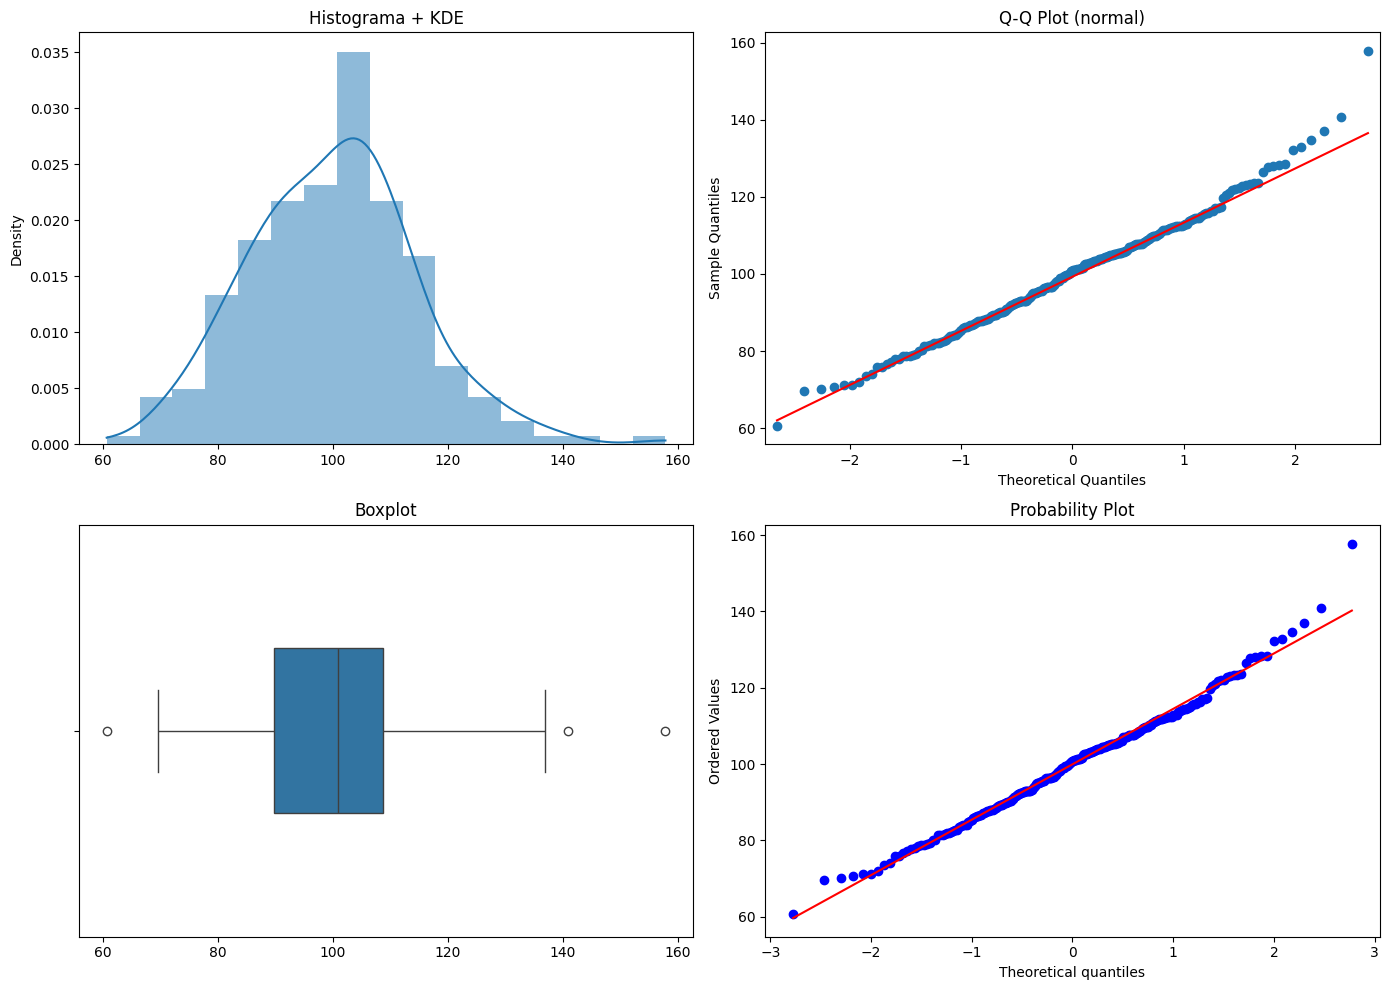

Recomendación final:
→ Mira principalmente el **Q-Q plot** y el **histograma**
→ Los p-valores son complementarios, pero con muestras grandes (>200-300) casi siempre rechazan normalidad aunque la desviación sea mínima.
→ Si n > 5000 → confiar más en gráficos que en Shapiro-Wilk


════════════════════════════════════════════════════════════
  ANÁLISIS DE NORMALIDAD → Datos exponenciales (no normales)
════════════════════════════════════════════════════════════

Estadísticos básicos:
  n          = 250
  Media      = 33.6770
  Mediana    = 24.0032
  Asimetría  = 2.0525
  Curtosis   = 6.4010  (normal ≈ 0)

Resultados de pruebas de normalidad (p-valor):
--------------------------------------------------
Shapiro-Wilk................ p = 0.000000  →  ✘ No normal
K-S (con parámetros estimados) p = 0.000001  →  ✘ No normal
Lilliefors.................. p = 0.001000  →  ✘ No normal
Anderson-Darling............ p = 0.000000  →  ✘ No normal
D'Agostino-Pearson.......... p = 0.000000  →  ✘ No normal

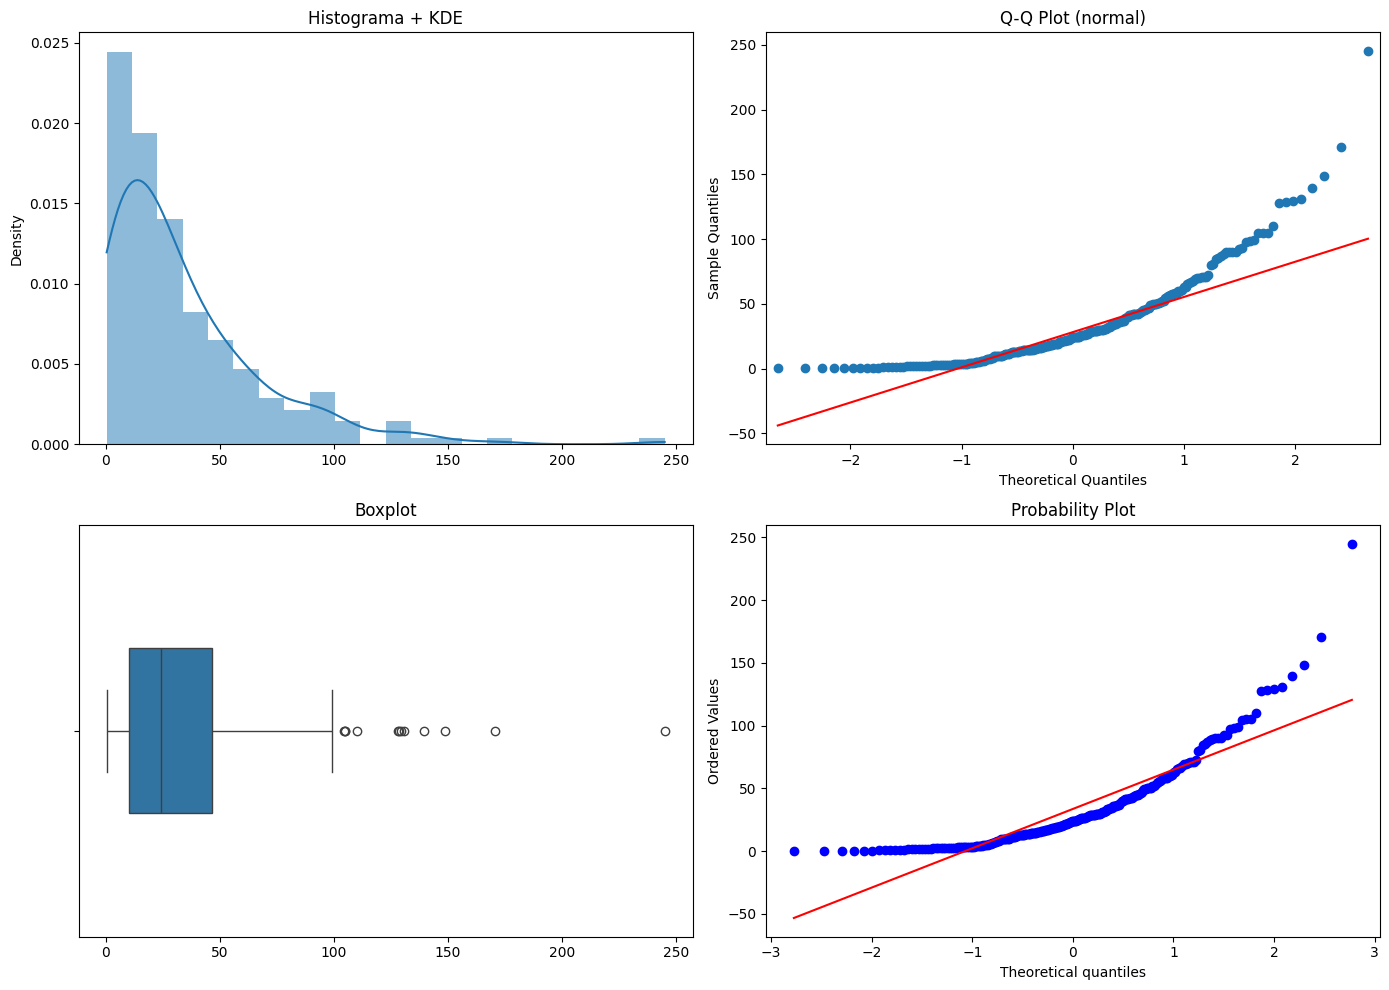

Recomendación final:
→ Mira principalmente el **Q-Q plot** y el **histograma**
→ Los p-valores son complementarios, pero con muestras grandes (>200-300) casi siempre rechazan normalidad aunque la desviación sea mínima.
→ Si n > 5000 → confiar más en gráficos que en Shapiro-Wilk



In [ ]:
# =============================================================
# Verificar si un conjunto de datos sigue distribución normal
# Métodos más utilizados en 2025
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

# ────────────────────────────────────────────────
# 1. Función principal de diagnóstico de normalidad
# ────────────────────────────────────────────────
def testear_normalidad(datos, nombre="Datos", alpha=0.05):
    """
    Realiza varios tests y gráficos para evaluar normalidad
    """
    print(f"\n{'═'*60}")
    print(f"  ANÁLISIS DE NORMALIDAD → {nombre}")
    print(f"{'═'*60}\n")

    # Convertimos a numpy array y quitamos NaN
    x = np.asarray(datos)
    x = x[~np.isnan(x)]

    if len(x) < 8:
        print("⚠️  Muy pocos datos para realizar pruebas confiables (< 8)")
        return

    # 1. Estadísticos descriptivos básicos
    print("Estadísticos básicos:")
    print(f"  n          = {len(x):,d}")
    print(f"  Media      = {np.mean(x):.4f}")
    print(f"  Mediana    = {np.median(x):.4f}")
    print(f"  Asimetría  = {stats.skew(x):.4f}")
    print(f"  Curtosis   = {stats.kurtosis(x, fisher=True):.4f}  (normal ≈ 0)\n")

    # 2. Tests de normalidad
    tests = {}

    # Shapiro-Wilk (muy usado para n < 5000)
    if len(x) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(x)
        tests["Shapiro-Wilk"] = shapiro_p

    # Kolmogorov-Smirnov + Lilliefors (corrección)
    ks_stat, ks_p = stats.kstest(x, 'norm', args=(np.mean(x), np.std(x, ddof=0)))
    tests["K-S (con parámetros estimados)"] = ks_p

    lillie_stat, lillie_p = lilliefors(x)
    tests["Lilliefors"] = lillie_p

    # Anderson-Darling
    anderson_result = stats.anderson(x, dist='norm')
    statistic = anderson_result.statistic
    critical_values = anderson_result.critical_values
    significance_level = anderson_result.significance_level # These are percentages

    if np.all(statistic < critical_values):
        # Statistic is smaller than all critical values, so p-value is very large.
        # Set to 1.0 to match the example output behavior for normal data, implying non-rejection.
        tests["Anderson-Darling"] = 1.0
    elif np.all(statistic >= critical_values):
        # Statistic is greater than or equal to all critical values, so p-value is very small.
        # Set to a very small number, indicating strong rejection.
        tests["Anderson-Darling"] = 1e-10
    else:
        # Statistic falls within the range of critical values.
        # Find the smallest significance level (converted to decimal) at which we DON'T reject.
        # This is equivalent to `anderson_result.significance_level[anderson_result.statistic < anderson_result.critical_values].min() / 100.0`
        # which will not be an empty array in this branch.
        tests["Anderson-Darling"] = significance_level[statistic < critical_values].min() / 100.0


    # D'Agostino-Pearson (prueba combinada asimetría + curtosis)
    dag_p = stats.normaltest(x).pvalue
    tests["D'Agostino-Pearson"] = dag_p

    # Mostrar resultados de pruebas
    print("Resultados de pruebas de normalidad (p-valor):")
    print("-"*50)
    for nombre_test, pvalor in tests.items():
        decision = "✔ Normal" if pvalor > alpha else "✘ No normal"
        print(f"{nombre_test:.<28} p = {pvalor:.6f}  →  {decision}")

    print(f"\nNivel de significancia usado: α = {alpha}")
    print(f"Regla: p-valor > {alpha} → no rechazamos normalidad\n")

    # ────────────────────────────────────────────────
    # Gráficos (muy recomendados — nunca confiar solo en p-valores)
    # ────────────────────────────────────────────────
    plt.figure(figsize=(14, 10))

    # 1. Histograma + curva normal
    plt.subplot(2, 2, 1)
    sns.histplot(x, kde=True, stat="density", linewidth=0)
    plt.title("Histograma + KDE")

    # 2. Q-Q plot
    plt.subplot(2, 2, 2)
    sm.qqplot(x, line='q', ax=plt.gca())
    plt.title("Q-Q Plot (normal)")

    # 3. Boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=x, width=0.4)
    plt.title("Boxplot")

    # 4. Probability plot (similar a Q-Q pero con otra escala)
    plt.subplot(2, 2, 4)
    stats.probplot(x, dist="norm", plot=plt)
    plt.title("Probability Plot")

    plt.tight_layout()
    plt.show()

    print("Recomendación final:")
    print("→ Mira principalmente el **Q-Q plot** y el **histograma**")
    print("→ Los p-valores son complementarios, pero con muestras grandes (>200-300) casi siempre rechazan normalidad aunque la desviación sea mínima.")
    print("→ Si n > 5000 → confiar más en gráficos que en Shapiro-Wilk\n")


# ────────────────────────────────────────────────
# Ejemplo de uso
# ────────────────────────────────────────────────

if __name__ == "__main__":

    # ── Ejemplo 1: datos que SÍ son normales ────────────
    np.random.seed(42)
    datos_normales = np.random.normal(100, 15, 250)

    # ── Ejemplo 2: datos que NO son normales ────────────
    datos_no_normales = np.random.exponential(scale=30, size=250)

    # Prueba ambos
    testear_normalidad(datos_normales, "Datos simulados normales")
    testear_normalidad(datos_no_normales, "Datos exponenciales (no normales)")

    # También puedes usar tus propios datos:
    # tus_datos = [12.5, 14.2, 11.8, ...]
    # testear_normalidad(tus_datos, "Mis mediciones")

In [ ]:
import numpy as np
from scipy import stats

datos = np.array([12, 15, 14, 16, 15, 14, 13, 15, 16, 14])

# Normalizar los datos
datos_norm = (datos - np.mean(datos)) / np.std(datos)

estadistico, p_valor = stats.kstest(datos_norm, 'norm')

print(f"Estadístico: {estadistico}")
print(f"p-valor: {p_valor}")

if p_valor > 0.05:
    print("Los datos siguen una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")
